# This notebook presents cv2.kmeans methods and all its nuances

Keeping in mind that OpenCV 4.0.0 version is being used to generate this results

## Important imports

In [1]:
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

cv2.__version__

'3.4.1'

## Verify documentation

double cv::kmeans 	( 	InputArray  	data,
		int  	K,
		InputOutputArray  	bestLabels,
		TermCriteria  	criteria,
		int  	attempts,
		int  	flags,
		OutputArray  	centers = noArray() 
	)
    
    
**data**: An array of N-Dimensional points with float coordinates is needed.  
**K**:    Number of clusters to split

## Initialize simulating data

This random function will generate a vector of 1000 numbers between [0,10]

In [2]:
A = np.random.randint(0,5,(500,2))
B = np.random.randint(5,10,(500,2))

data = np.float32(np.hstack((A,B)))
# data = np.float32(data)

## Define amount of clusters

In [3]:
clusters=2

## Define criteria

Termination criteria. The maximum number of iterations and/or the desired accuracy.  
The accuracy is criteria.epsilon.  
As soon as the cluster center is less than criteria.epsilon, the algorithm stops.

In [4]:
# Tuple of 3 parameters
typ = [cv2.TERM_CRITERIA_EPS, cv2.TERM_CRITERIA_MAX_ITER, cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER]
max_iter = [10, 20, 50, 100]
epsilon = [0.7, 0.9, 1.0]

## Lets run

In [7]:
centers

array([[2.1400778, 1.9143969, 6.840467 , 8.015564 ],
       [1.7201645, 2.0823045, 7.1111107, 5.580247 ]], dtype=float32)

(2, 10, 0.7)


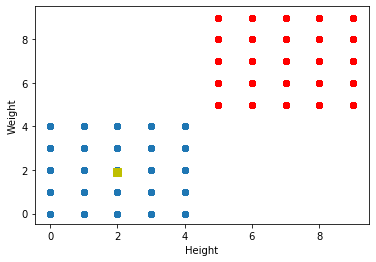

(2, 10, 0.9)


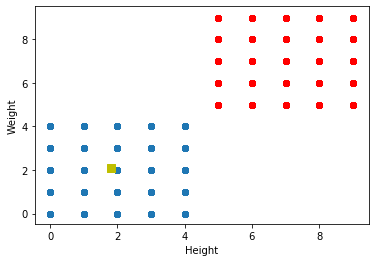

(2, 10, 1.0)


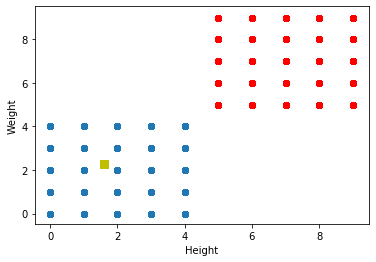

(2, 20, 0.7)


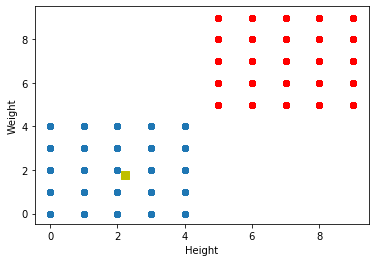

(2, 20, 0.9)


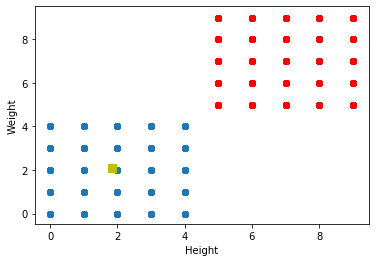

(2, 20, 1.0)


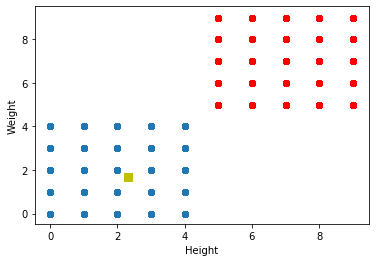

(2, 50, 0.7)


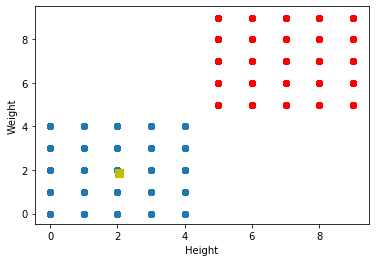

(2, 50, 0.9)


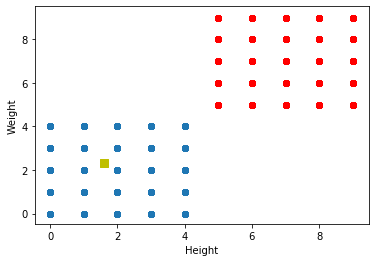

(2, 50, 1.0)


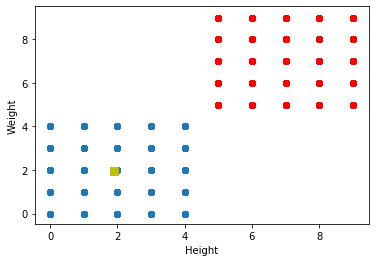

(2, 100, 0.7)


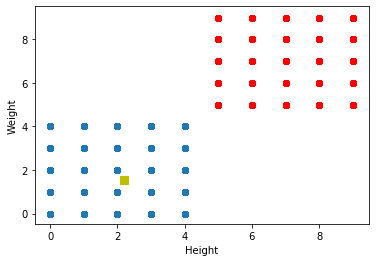

(2, 100, 0.9)


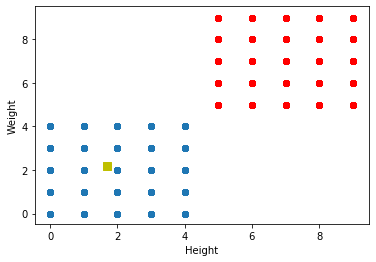

(2, 100, 1.0)


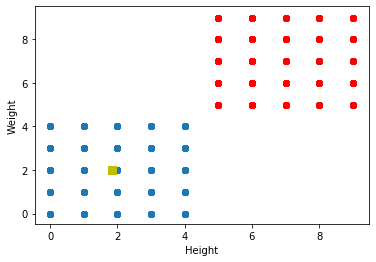

(1, 10, 0.7)


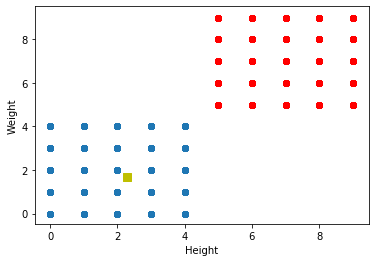

(1, 10, 0.9)


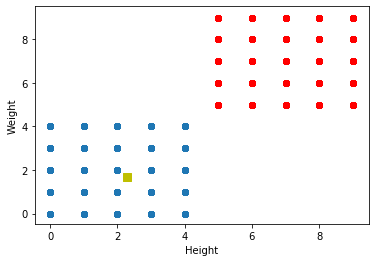

(1, 10, 1.0)


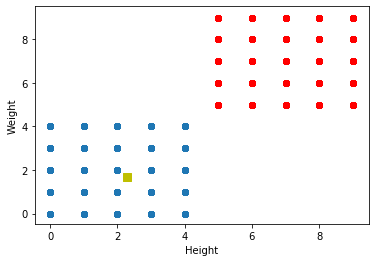

(1, 20, 0.7)


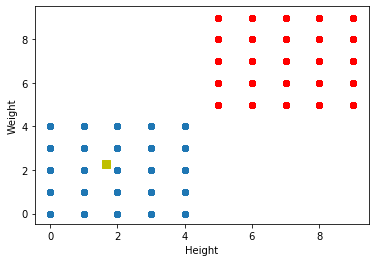

(1, 20, 0.9)


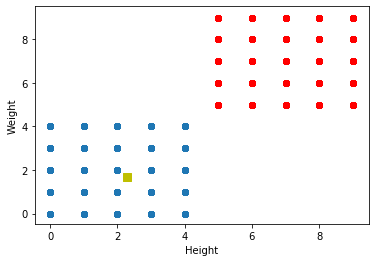

(1, 20, 1.0)


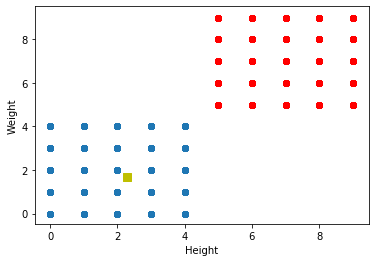

(1, 50, 0.7)


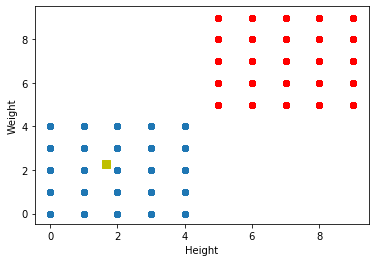

(1, 50, 0.9)


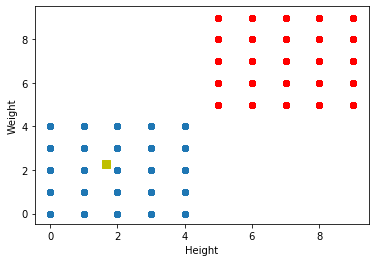

(1, 50, 1.0)


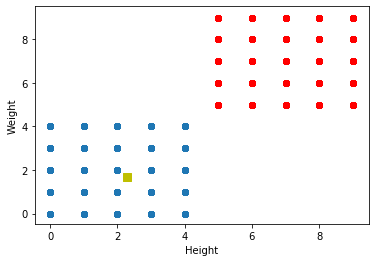

(1, 100, 0.7)


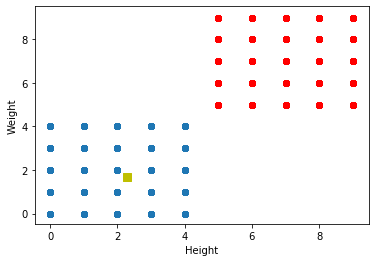

(1, 100, 0.9)


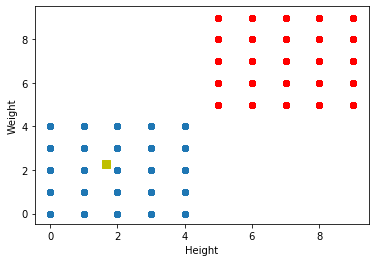

(1, 100, 1.0)


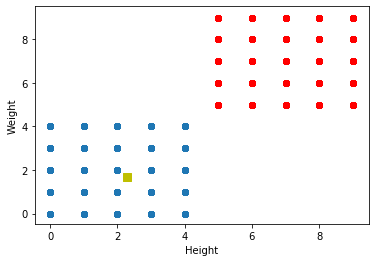

(3, 10, 0.7)


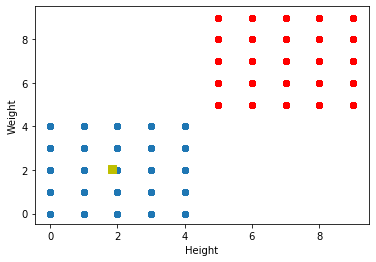

(3, 10, 0.9)


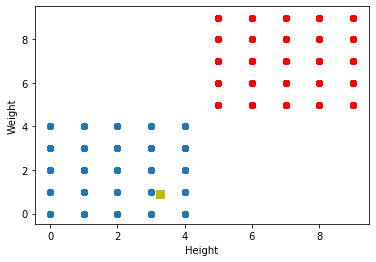

(3, 10, 1.0)


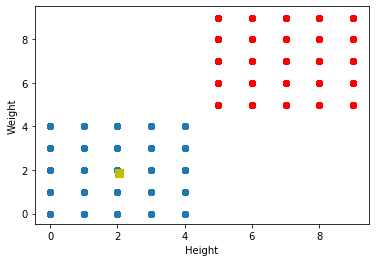

(3, 20, 0.7)


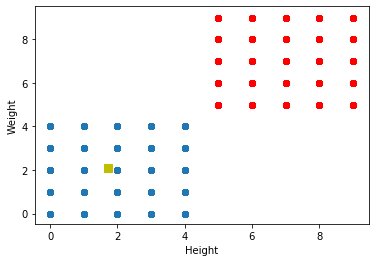

(3, 20, 0.9)


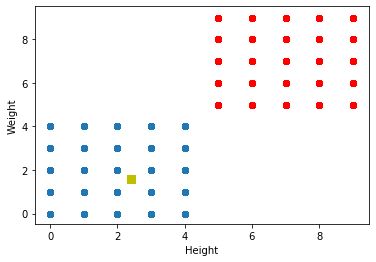

(3, 20, 1.0)


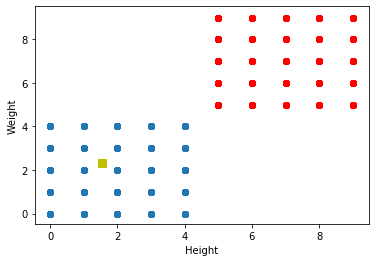

(3, 50, 0.7)


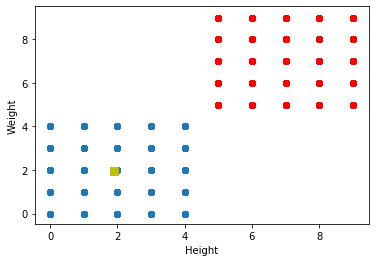

(3, 50, 0.9)


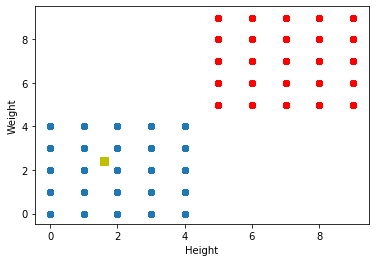

(3, 50, 1.0)


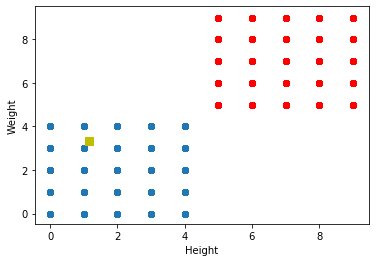

(3, 100, 0.7)


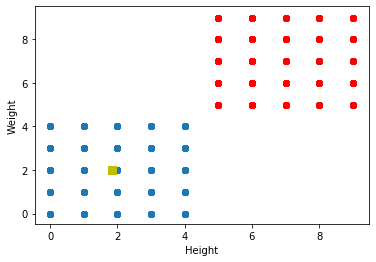

(3, 100, 0.9)


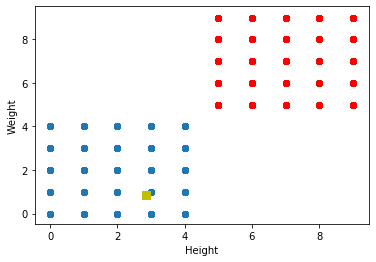

(3, 100, 1.0)


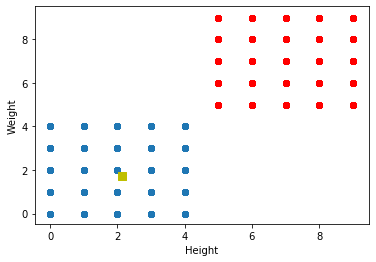

In [6]:
for t in typ:
    for i in max_iter:
        for e in epsilon:
            criteria = (t, i, e)
            print(criteria)
            retval, bestLabels, centers = cv2.kmeans(data=data, 
                                                     K=clusters, 
                                                     bestLabels=None, 
                                                     criteria=criteria, 
                                                     attempts=10, 
                                                     flags = cv2.KMEANS_RANDOM_CENTERS)
            
            # Plot the data
            plt.scatter(A[:,0],A[:,1])
            plt.scatter(B[:,0],B[:,1],c = 'r')
            plt.scatter(centers[0, 0],centers[1, 0],s = 80,c = 'y', marker = 's')
            plt.xlabel('Height'),plt.ylabel('Weight')
            plt.show()